<a href="https://colab.research.google.com/github/fleshgordo/dataexploration/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration with pandas

Pandas is a powerful and flexible Python library used for data manipulation and analysis. This handbook is designed to help you understand and master the fundamental concepts and operations of Pandas, making your data analysis tasks more efficient and insightful. And hopefully more fun.

## What Will You Learn?

- **Basics of Pandas**: Understand the core structures of Pandas.
- **Data Manipulation**: Learn how to manipulate data in DataFrames including sorting, filtering, and aggregating data.
- **Data Cleaning**: Techniques to handle missing data, remove duplicates, and fix data inconsistencies.
- **Data visualisation** *italicised text*: Introduction to plotting with Pandas and its integration with Matplotlib for visual data analysis.

I use pandas very often for quick and efficient analysis, not per se for visualisation since you can quickly reach its limits in terms of aesthetics. Nonetheless, it's great (plus really fast) for [data-crunching](https://www.netsuite.com/portal/resource/articles/erp/data-crunching.shtml). Once you did your analysis, you can export a clean CSV file which you can use later on.

## Basics

Python is a versatile programming language that's great for handling data. While basic data structures like lists and dictionaries are useful, pandas provides a more powerful way to work with structured data.

In [ ]:
# A simple list in Python
data = [1, 2, 3, 4, 5, 929725, 9119]
print(data)
print("asdljasdf")
print("-----")
print(f"First entry is: {data[5]}")

[1, 2, 3, 4, 5, 929725, 9119]
asdljasdf
-----
First entry is: 929725


### Importing pandas
First, we need to import the pandas library to get started.

In [ ]:
import pandas as pd

### Creating a Sample Dataset

We'll work with a simple dataset of six students, including their names, ages, and grades.

In [ ]:
# Sample data
data = {
    'Name': ['Niels', 'Maisa', 'Adelina', 'Silvia', 'Thomas', 'Perla','Timo','Jennifer','Anouk','Lukas','Dania','Fabia','Christine','Noelia','Fiona'],
    'Age': [20, 22, 20, 21, 22, 30, 25, 28, 29, 31, 19, 21, 24, 28, 30],
    'Grade': [88, 92, 88, 95, 92, 87, 88, 92, 85, 95, 92, 87, 60, 70, 80]
}

# Create a DataFrame
df = pd.DataFrame(data)

Let's view the DataFrame:

In [ ]:
df

,Name,Age,Grade
0,Niels,20,88
1,Maisa,22,92
2,Adelina,19,85
3,Silvia,21,95
4,Thomas,22,92
5,Perla,30,87
6,Timo,25,88
7,Jennifer,28,92
8,Anouk,29,85
9,Lukas,31,95


Exploring the Data

In [ ]:
# Display the first five rows
df.head()

,Name,Age,Grade
0,Niels,20,88
1,Maisa,22,92
2,Adelina,19,85
3,Silvia,21,95
4,Thomas,22,92


Understanding the DataFrame Structure

In [ ]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    15 non-null     object
 1   Age     15 non-null     int64 
 2   Grade   15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


Descriptive Statistics

In [ ]:
# Get statistical summary
df.describe()

,Age,Grade
count,15.00000,15.000000
mean,24.60000,86.200000
std,4.35562,9.064846
min,19.00000,60.000000
25%,21.00000,85.000000
50%,24.00000,88.000000
75%,28.50000,92.000000
max,31.00000,95.000000


In [ ]:
# get the average values for the dataframe
df.mean(numeric_only=True)

Show only one column of the data series

In [ ]:
df["Age"]

,Age
0,20
1,22
2,19
3,21
4,22
5,30
6,25
7,28
8,29
9,31


### Data cleaning

Checking for Missing Values

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Name,0
Age,0
Grade,0


Since our dataset is (still ;)) clean, there are no missing values. If there were, we could handle them using:

In [ ]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

Checking for Duplicates

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

1

If you have duplicates you could again delete them via:

In [ ]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [ ]:
df

,Name,Age,Grade
0,Niels,20,88
1,Maisa,22,92
2,Adelina,20,88
3,Silvia,21,95
4,Thomas,22,92
5,Perla,30,87
6,Timo,25,88
7,Jennifer,28,92
8,Anouk,29,85
9,Lukas,31,95


### Data Type Conversion

Sometimes you want to make sure that data types are appropriate. This can help to fix problems at later stage with data analysis. In many case, pandas will assign the correct data type while importing but sometimes you have to do it by hand. And in most cases, you don't really have to think about it. *italicised text*

In [ ]:
# Check data types
df.dtypes

In [ ]:
# convert the Name to a string type
df["Age"] = df['Age'].astype(float)
df

### Data Filtering and Modification

#### Filtering Data
Select students who scored above 90.

In [ ]:
# Filter students with grades above 90
high_achievers = df[df['Age'] > 20]
high_achievers
#df["Grade"]

,Name,Age,Grade
1,Maisa,22,92
3,Silvia,21,95
4,Thomas,22,92
5,Perla,30,87
6,Timo,25,88
7,Jennifer,28,92
8,Anouk,29,85
9,Lukas,31,95
11,Fabia,21,87
12,Christine,24,60


Sorting is quite easy to achieve.

In [ ]:
# Sort the DataFrame by Age
#df_sorted = df.sort_values('Age')
#df_sorted = df.sort_values('Name')
df_sorted = df.sort_values('Grade',ascending=False)

df_sorted

,Name,Age,Grade
3,Silvia,21,95
9,Lukas,31,95
1,Maisa,22,92
4,Thomas,22,92
7,Jennifer,28,92
10,Dania,19,92
0,Niels,20,88
2,Adelina,20,88
6,Timo,25,88
5,Perla,30,87


#### Adding a New Column
Create a new column to categorize grades.

In [ ]:
# Define a function to categorize grades
def grade_category(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    else:
        return 'C'

# Apply the function to create a new column
df['Grade Category'] = df['Grade'].apply(grade_category)
df

,Name,Age,Grade,Grade Category
0,Niels,20,88,B
1,Maisa,22,92,A
2,Adelina,20,88,B
3,Silvia,21,95,A
4,Thomas,22,92,A
5,Perla,30,87,B
6,Timo,25,88,B
7,Jennifer,28,92,A
8,Anouk,29,85,B
9,Lukas,31,95,A


,Grade
0,88
1,92
2,88
3,95
4,92
5,87
6,88
7,92
8,85
9,95


### Updating Existing Data

Students want better grades, right? Everyone's grade increases by 5 points. How can we achieve that?

In [ ]:
# Increase all grades by 5
df['Grade'] = df['Grade'] + 5
#df['Age'] = df['Age'] + 2

df

,Name,Age,Grade,Grade Category
0,Niels,22,103,B
1,Maisa,24,107,A
2,Adelina,22,103,B
3,Silvia,23,110,A
4,Thomas,24,107,A
5,Perla,32,102,B
6,Timo,27,103,B
7,Jennifer,30,107,A
8,Anouk,31,100,B
9,Lukas,33,110,A


We should avoid grades exceed the 100, right?

In [ ]:
# Ensure grades do not exceed 100
df['Grade'] = df['Grade'].apply(lambda x: 100 if x > 100 else x)
df

,Name,Age,Grade,Grade Category
0,Niels,22,100,B
1,Maisa,24,100,A
2,Adelina,22,100,B
3,Silvia,23,100,A
4,Thomas,24,100,A
5,Perla,32,100,B
6,Timo,27,100,B
7,Jennifer,30,100,A
8,Anouk,31,100,B
9,Lukas,33,100,A


### Exporting Data

Save the modified DataFrame to a new CSV file

In [ ]:
# Export DataFrame to CSV (in colab have a look for newly created file csv)
df.to_csv('students_modified.csv', index=False)

# we use index=False to ignore the index that came along with pandas

### Importing Data

CSV or JSON files can be imported quite easily

In [ ]:
df = pd.read_csv('students_modified.csv')
df

,Name,Age,Grade,Grade Category
0,Niels,22,100,B
1,Maisa,24,100,A
2,Adelina,22,100,B
3,Silvia,23,100,A
4,Thomas,24,100,A
5,Perla,32,100,B
6,Timo,27,100,B
7,Jennifer,30,100,A
8,Anouk,31,100,B
9,Lukas,33,100,A


## Visualisations

Python has various plotting libraries. Most basic and famous one is matplotlib. First, as usual, let's import it:

In [ ]:
import matplotlib.pyplot as plt

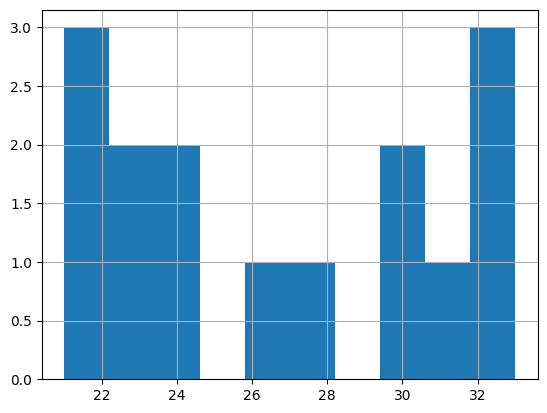

In [ ]:
# Plot a histogram of student ages
df['Age'].hist()
plt.show()

If you want to give labels and a title, there are several plt functions available (more info [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel))

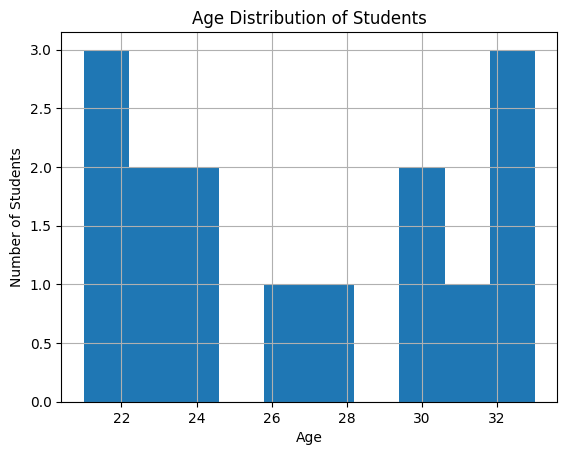

In [ ]:
# Plot a histogram of student ages
df['Age'].hist()
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()

### Understanding the plt Object
The plt object acts as a convenient interface for creating and customising plots. Here's why we can use methods like hist, bar, etc.:

* **plt.hist()**: Creates a histogram, which is useful for showing the distribution of a dataset.
* **plt.bar()**: Generates a bar chart, ideal for comparing quantities across different categories.
* **plt.plot()**: Plots data as lines and/or markers, commonly used for line graphs.
* **plt.scatter()**: Creates a scatter plot, displaying values for typically two variables for a set of data.
* **plt.pie()**: Generates a pie chart, representing data in terms of proportions.

These functions internally manage the creation of figures, axes, and plots, allowing us to focus on the data visualisation rather than the underlying mechanics.

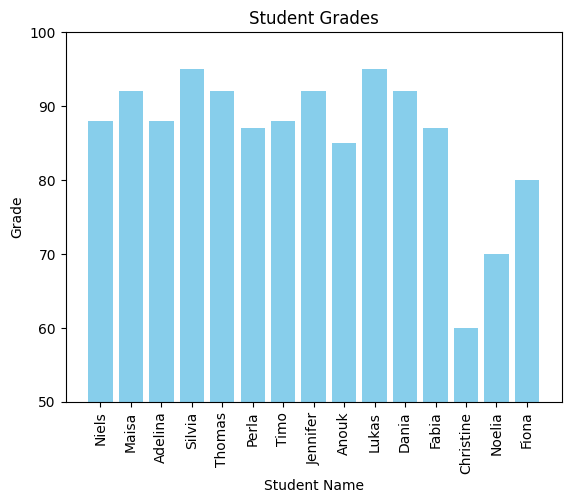

In [ ]:
# Plot a bar chart of student grades
plt.bar(df['Name'], df['Grade'], color='skyblue')
plt.title('Student Grades')
plt.xlabel('Student Name')
plt.ylabel('Grade')
plt.xticks(rotation=90)
plt.ylim(50, 100)  # Set y-axis limits for better visualisation
plt.show()

### Scatter plot

A scatter plot is useful for visualizing the relationship between two numerical variables. `plt.scatter()` plots individual data points.

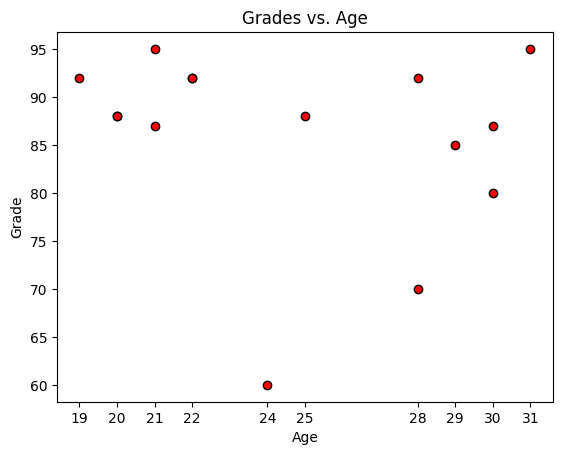

In [ ]:
# Plot a scatter plot of grades vs. age
plt.scatter(df['Age'], df['Grade'], color='red', edgecolor='black')
plt.title('Grades vs. Age')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.xticks(df['Age'].unique())
plt.show()

### Saving plot

You can save your plots to image files using `plt.savefig()`:

In [ ]:
# Save the last plot as a PNG file
plt.savefig('grades_vs_age.png',dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In case your png file is blank white,make sure you call savefig before the show() function:

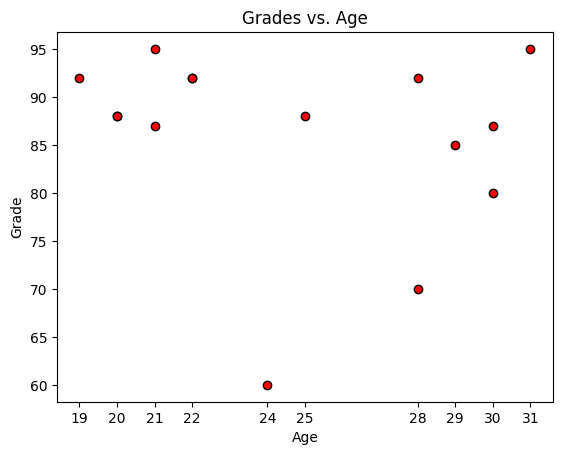

In [ ]:
# Plot a scatter plot of grades vs. age
plt.scatter(df['Age'], df['Grade'], color='red', edgecolor='black')
plt.title('Grades vs. Age')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.xticks(df['Age'].unique())
plt.savefig('grades_vs_age.svg')
plt.show()

### Other librarires


#### Plotly

Plotly is a graphing library that makes interactive, publication-quality graphs. It supports interactive plotting in Jupyter notebooks.

In [ ]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='Age', y='Grade', color='Grade Category',
                 title='Grades vs. Age by Grade Category',
                 labels={'Grade': 'Grade', 'Age': 'Age'},
                 hover_data=['Name'])
fig.show()

#### Seaborn

Seaborn is built on top of matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

In [ ]:
import seaborn as sns

# Scatter plot with regression line
sns.lmplot(x='Age', y='Grade', data=df, hue='Grade Category', fit_reg=True)
plt.title('Grades vs. Age with Regression Line')
plt.show()

## Exercises


### Exercise 1
Imagine what kind of analyis could be done with the dataset? Prepare first questions you want to "ask" to the dataset. Then try prompting to modify the `df` object by filtering, sorting, other analysis. Once you feel comfortable with the dataset, you can also extend your dataset by downloading a bigger student dataset (see section fake data)

### Exercise 2 (individual)

Try loading another CSV files from previous workshops. Can you load it into pandas? Can you batch modify values and visualise them?


,Name,Age,Grade,Grade Category
5,Perla,30,87,B
7,Jennifer,28,92,A
8,Anouk,29,85,B
9,Lukas,31,95,A
13,Noelia,28,70,C
14,Fiona,30,80,B


## Fake data



We can quickly generata a synthetic dataset for testing purposes. Make sure you imported the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import random

# Optional: Install and import faker for realistic names
!pip install faker
from faker import Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.0 MB/s eta 0:00:00


The faker library is helpful in creating "fake" real data. First, initialise it:

In [ ]:
fake = Faker()

Then, let's generate data in a loop

In [ ]:
# Lists to store the data
names = []
ages = []
grades = []

# Generate data for 100 students
for _ in range(100):
    # Generate a fake name
    name = fake.name()
    names.append(name)

    # Generate a random age between 18 and 30
    age = random.randint(18, 30)
    ages.append(age)

    # Generate a random grade between 60 and 100
    grade = random.randint(60, 100)
    grades.append(grade)

In [ ]:
print(names)
print(grades)
print(ages)

['Stephanie Moss', 'Kristina Crawford', 'Joel Jones', 'Glenn Morris', 'Teresa Weaver', 'Christopher Jarvis', 'Bradley Garner', 'Dr. Kristen Martin', 'Tyler Marsh', 'Tammy Braun', 'Kevin Bishop', 'Lindsey Anderson', 'Ruth Michael', 'Glenda Anderson', 'Kyle Taylor', 'Tiffany Williams', 'Hannah Young', 'Stephen Thomas', 'Scott Norman', 'Jason Lamb', 'James Gutierrez', 'David Wallace', 'Kimberly Kennedy', 'Alexander Conner', 'Nicole West', 'Allison Moore', 'Michelle Charles', 'Jacob Moore', 'David Brewer', 'Tricia Thompson', 'Sarah Carter', 'Mario Brown', 'Jonathan Blake', 'David Hughes', 'Erika Garcia', 'Marvin Mccarthy', 'Kenneth Carter', 'Carolyn Evans', 'Lindsey Carter', 'Cynthia Coleman', 'Rachel Conley', 'Jacqueline Mason', 'Michelle Peterson', 'Alexandria Sanders', 'Dawn Fritz', 'Sarah Gregory', 'Alicia Medina', 'George Smith', 'Rebecca Brown', 'Kyle Bridges', 'James Cardenas', 'Anthony Brown', 'Patricia Rivera', 'Julie Shaffer', 'Steve Armstrong', 'Casey Mcdowell', 'David Davis', '

Create a dataframe with pandas by passing the newly generated lists:

In [ ]:
# Create a dictionary with the data
data = {
    'Name': names,
    'Age': ages,
    'Grade': grades
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

In [ ]:
# show dataframe
df

# OECD data

### Getting the data


Before we start we need to download the CSV files into our temporary drive. By executing following line you'll download all csv files

In [ ]:
!wget -O example.zip "https://drive.switch.ch/index.php/s/JeNWvdjnqn7BoHR/download"

--2024-09-23 08:41:33--  https://drive.switch.ch/index.php/s/JeNWvdjnqn7BoHR/download
Resolving drive.switch.ch (drive.switch.ch)... 86.119.34.138, 86.119.34.137, 2001:620:5ca1:1ee::11, ...
Connecting to drive.switch.ch (drive.switch.ch)|86.119.34.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16881 (16K) [application/zip]
Saving to: ‘example.zip’

example.zip         100%[===================>]  16.49K  --.-KB/s    in 0.1s    

2024-09-23 08:41:34 (139 KB/s) - ‘example.zip’ saved [16881/16881]



In [ ]:
!unzip "example.zip"
#!head example.zip

Archive:  example.zip
  inflating: dimensions_labels.csv   
  inflating: __MACOSX/._dimensions_labels.csv  
  inflating: dimensions_scores_historic.csv  
  inflating: __MACOSX/._dimensions_scores_historic.csv  
  inflating: dimensions_scores.csv   
  inflating: __MACOSX/._dimensions_scores.csv  
  inflating: economies_labels.csv    
  inflating: __MACOSX/._economies_labels.csv  
  inflating: indicators_labels.csv   
  inflating: __MACOSX/._indicators_labels.csv  
  inflating: indicators_scores.csv   
  inflating: __MACOSX/._indicators_scores.csv  
  inflating: structure.csv           
  inflating: __MACOSX/._structure.csv  
  inflating: subdimensions_labels.csv  
  inflating: __MACOSX/._subdimensions_labels.csv  
  inflating: subdimensions_scores.csv  
  inflating: __MACOSX/._subdimensions_scores.csv  


Explanation:

`!` allows you to run shell commands in Colab notebooks.

`!wget` downloads the file at the provided path.

`-O example.zip` specifies the output filename as example.zip.

with `!unzip` we extract the zip file immediately after download.

In [ ]:
import pandas as pd
df = pd.read_csv('dimensions_scores_historic.csv')

One of the core data structures in pandas is the DataFrame, which can be thought of as a table of data, with rows and columns.

A **DataFrame** is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is similar to a SQL table or an Excel spreadsheet. We store the dataframe in a variable called `df`


In [ ]:
df

,key,economy,year,score
0,INVESTMENT,ALB,2018,2.60
1,INVESTMENT,ALB,2021,3.10
2,INVESTMENT,ALB,2024,3.63
3,INVESTMENT,BIH,2018,2.10
4,INVESTMENT,BIH,2021,2.70
...,...,...,...,...
310,TOURISM,SRB,2021,2.30
311,TOURISM,SRB,2024,2.80
312,TOURISM,WB6_AVG,2018,1.70
313,TOURISM,WB6_AVG,2021,2.00


In [ ]:
df.info()

## Basic Filtering

Before visualising we might want to filter the dataframe. It contains quite a lot of data. Let's focus on a specific year (2024) and a specific economy (choose one).

Below we will output the dataframe and then click on the interactive chart icon (little pocket calculator on right side next to the table)

In [ ]:
df

There's a filter button which let's use apply various filter options and the possibility to immediately export the filtered dataset as CSV, JSON or Markdown file.

For applying a simple filter, you'll need to use the bracket syntax:

In [ ]:
# Filter the dataframe for economy 'MNE' and year 2024
df_filtered = df[(df['economy'] == 'MNE')]
df_filtered

,key,economy,year,score
9,INVESTMENT,MNE,2018,2.60
10,INVESTMENT,MNE,2021,3.20
11,INVESTMENT,MNE,2024,3.38
30,TRADE,MNE,2018,2.60
31,TRADE,MNE,2021,3.20
32,TRADE,MNE,2024,3.90
51,FINANCE,MNE,2018,2.40
52,FINANCE,MNE,2021,2.70
53,FINANCE,MNE,2024,3.00
72,TAX,MNE,2018,2.00


Let's combine two filter options by using the `&` sign:

In [ ]:
# Filter the dataframe for economy 'MNE' and year 2024
#df_filtered = df[(df['economy'] == 'MNE') & (df['year'] == 2018)]

# Be careful with data types 2024 != "2024"
#df_filtered = df[(df['economy'] == 'MNE') & (df['year'] == "2024")]

# Three filters all at once
#df_filtered = df[(df['economy'] == 'MNE') & (df['year'] == 2024) & (df['key'] == "TRADE")]

# Combine any ...
df_filtered = df[(df['key'] == "TRADE")]

df_filtered

,key,economy,year,score
21,TRADE,ALB,2018,2.80
22,TRADE,ALB,2021,3.30
23,TRADE,ALB,2024,4.00
24,TRADE,BIH,2018,2.20
25,TRADE,BIH,2021,2.50
26,TRADE,BIH,2024,3.56
27,TRADE,KOS,2018,2.30
28,TRADE,KOS,2021,3.50
29,TRADE,KOS,2024,4.10
30,TRADE,MNE,2018,2.60


## Labels and scores

Let's import labels and scores seperately

In [ ]:
# Load labels
dimensions_labels = pd.read_csv('dimensions_labels.csv')
economies_labels = pd.read_csv('economies_labels.csv')
indicators_labels = pd.read_csv('indicators_labels.csv')
subdimensions_labels = pd.read_csv('subdimensions_labels.csv')

# Load scores
dimensions_scores = pd.read_csv('dimensions_scores.csv')
indicators_scores = pd.read_csv('indicators_scores.csv')
subdimensions_scores = pd.read_csv('subdimensions_scores.csv')


In [ ]:
dimensions_scores

Now we can merge the two dataframes by using the same key as identifier:

In [ ]:
dimensions_merged = pd.merge(dimensions_scores, dimensions_labels, on='key', how='left')
dimensions_merged

## Visualising



### Basics

Let's work with a small dataset to begin with. We use the filtered dataset which we've used before

In [ ]:
# prompt: Using dataframe df: filter for economy alb and year 2024

# Filter the dataframe for economy 'ALB' and year 2024
df_filtered = df[(df['economy'] == 'ALB') & (df['year'] == 2024)]

# Display the filtered dataframe
df_filtered

,key,economy,year,score
2,INVESTMENT,ALB,2024,3.63
23,TRADE,ALB,2024,4.00
44,FINANCE,ALB,2024,3.00
65,TAX,ALB,2024,3.40
86,ENTERPRISE,ALB,2024,2.30
107,ANTI_CORRUPTION,ALB,2024,3.19
128,EDUCATION,ALB,2024,3.61
149,EMPLOYMENT,ALB,2024,3.46
170,INNOVATION,ALB,2024,2.39
191,DIGITAL,ALB,2024,2.73


Use a basic matplot function to create a bar-chart:

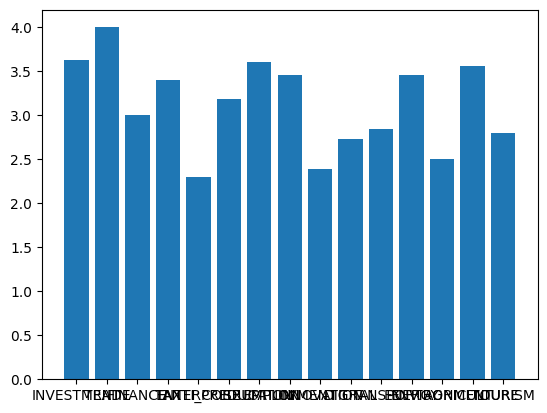

In [ ]:
plt.bar(df_filtered['key'],df_filtered['score'])
plt.show()

Quite messy, let's label the axis and use other colours:

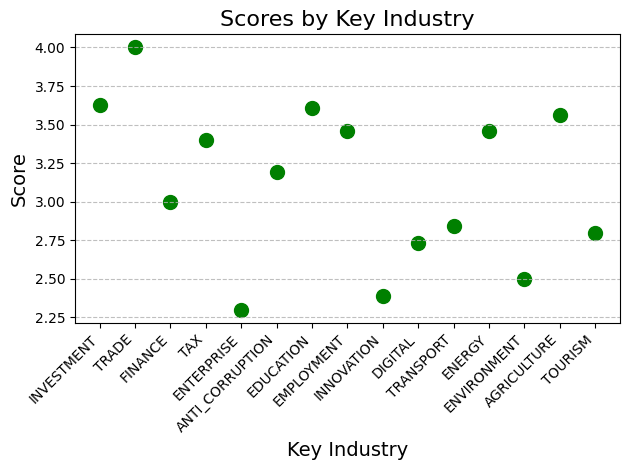

In [ ]:
# Create the bar chart
#plt.bar(df_filtered['key'], df_filtered['score'], color='skyblue', edgecolor='black')

# Create the scatter plot
plt.scatter(df_filtered['key'], df_filtered['score'], color='green', s=100)

# Add titles and labels
plt.title('Scores by Key Industry', fontsize=16)
plt.xlabel('Key Industry', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines (optional)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Display the plot
plt.tight_layout()


### Seaborn

For plotting more advanced graphs we need to use an additional library called seaborn. [Matplot](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) are popular python libraries to visualise data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='economy', y='score', hue='year', data=df, errorbar=None)

Which key is the graph above actually using? It seems the values shown don't fit any key category. The barplot function aggregates automatically the values across all key entries ("INDUSTRY", "ANTI_CORRUPTION", etc...)

If we want to visualise just one key aspect we'll filter first the df:

In [ ]:
# Assume your original DataFrame is named df
key_to_plot = 'INVESTMENT'

# Filter the DataFrame for the specific key
df_filtered = df[df['key'] == key_to_plot]
df_filtered

In [ ]:
# Plotting a selection
bar_plot = sns.barplot(x='economy', y='score', hue='year', data=df_filtered, errorbar=None)

#### Plotting all keys into several plots

For this we need to create a loop and iterate over the individual keys. Since each row has the key, we want to make sure first, that we only the unique entries (across the 15 keys).

In [ ]:
unique_keys = df['key'].unique()
unique_keys

In [ ]:
# Iterate over this array by using each key indiviually
for key in unique_keys:
    plt.figure(figsize=(10, 6))
    subset = df[df['key'] == key]
    sns.barplot(x='economy', y='score', hue='year', data=subset, palette='viridis')
    plt.title(f'Scores by Country for {key} in 2024')
    plt.xlabel('Country')
    plt.ylabel('Score')
    plt.legend(title='Year')
    plt.show()

This becomes hard to read, since all the graphs are plotted one after the other. With catplot you can plot all keys into a multi-faceted plot. By passing `col='key'` it automatically produces a plot for each key:

In [ ]:
g = sns.catplot(
    x='economy',
    y='score',
    hue='year',
    col='key',
    data=df,
    kind='bar',
    col_wrap=3,  # Adjust based on how many plots you want per row
    height=5,
    aspect=1.5,
    palette='viridis'
)
g.set_titles("{col_name}")
g.set_axis_labels("economy", "Score")
g.add_legend(title='Year')
plt.show()

### plotly



Plotly's Python graphing library makes interactive, publication-quality graphs. See [examples](https://plotly.com/python/) here.

If not yet done, install plotly and import it:

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Create a bar chart
fig = px.bar(df, x='economy', y='score', color='economy',facet_col='key',facet_row='year',title='test')

# Show the plot
fig.show()

In [ ]:
# Create a faceted line plot to visualise the trend of scores for each economy (country) over the years, separated by the 'key' column.
fig = px.line(df,
              x='year',
              y='score',
              color='economy',
              facet_col='key',
              markers=True,
              facet_col_wrap=5,
              title='Country Scores by Year, Separated by Key Category',
              labels={'economy': 'Country', 'score': 'Score', 'year': 'Year'})

# Show the plot
fig.show()

### Sub-dimensions



Let's look at the sub-dimension:

In [ ]:
# Let's first load the subdimensions_labels.csv file to inspect its contents and see how we can merge it with the existing subdimensions_scores data.

# Load the subdimensions labels CSV
labels_df = pd.read_csv('/content/subdimensions_labels.csv')

# Display the first few rows of the labels DataFrame to inspect
labels_df.head()

subdimensions_df = pd.read_csv('/content/subdimensions_scores.csv')
subdimensions_df

,key,economy,year,score
0,INVESTMENT_S01,ALB,2024,4.3
1,INVESTMENT_S01,BIH,2024,3.6
2,INVESTMENT_S01,KOS,2024,3.8
3,INVESTMENT_S01,MNE,2024,3.7
4,INVESTMENT_S01,MKD,2024,3.7
...,...,...,...,...
345,TOURISM_S03,KOS,2024,1.5
346,TOURISM_S03,MNE,2024,4.2
347,TOURISM_S03,MKD,2024,1.4
348,TOURISM_S03,SRB,2024,2.3


In [ ]:
subdimensions_df.info()

In [ ]:
labels_df

For better readability let's merge them. The `merge()` function can merge two dataframes. You need to specify which column is the combined one (existing in both dataframes). The new dataframe is saved in a variable `merged_df`

In [ ]:

# Merge the subdimensions_scores and labels dataframes based on the 'key' column
merged_df = pd.merge(subdimensions_df, labels_df, on='key', how='left')


#merged_df[merged_df['economy'] != 'WB6_AVG']
#merged_df
merged_df = merged_df[merged_df['economy'] != 'WB6_AVG']
merged_df

,key,economy,year,score,label
0,INVESTMENT_S01,ALB,2024,4.3,Investment policy framework
1,INVESTMENT_S01,BIH,2024,3.6,Investment policy framework
2,INVESTMENT_S01,KOS,2024,3.8,Investment policy framework
3,INVESTMENT_S01,MNE,2024,3.7,Investment policy framework
4,INVESTMENT_S01,MKD,2024,3.7,Investment policy framework
...,...,...,...,...,...
344,TOURISM_S03,BIH,2024,0.8,Sustainable and competitive tourism
345,TOURISM_S03,KOS,2024,1.5,Sustainable and competitive tourism
346,TOURISM_S03,MNE,2024,4.2,Sustainable and competitive tourism
347,TOURISM_S03,MKD,2024,1.4,Sustainable and competitive tourism


Create a heatmap with plotly

In [ ]:
heatmap_data_with_labels = merged_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')
heatmap_data_with_labels

key,AGRICULTURE_S01,AGRICULTURE_S02,AGRICULTURE_S03,ANTI_CORRUPTION_S01,ANTI_CORRUPTION_S02,ANTI_CORRUPTION_S03,ANTI_CORRUPTION_S04,DIGITAL_S01,DIGITAL_S02,DIGITAL_S03,...,TAX_S02,TOURISM_S01,TOURISM_S02,TOURISM_S03,TRADE_S01,TRADE_S02,TRADE_S03,TRANSPORT_S01,TRANSPORT_S02,TRANSPORT_S03
economy,,,,,,,,,,,,,,,,,,,,,
ALB,3.5,3.5,3.8,2.8,3.5,2.0,3.8,3.2,2.5,2.3,...,3.7,2.9,3.3,2.0,4.8,4.3,3.0,3.5,2.4,2.3
BIH,2.3,2.7,2.6,1.3,1.6,1.6,1.3,2.0,1.7,1.3,...,2.9,1.4,1.8,0.8,4.3,2.6,3.8,2.0,1.0,1.8
KOS,3.8,3.5,2.8,1.7,2.7,1.3,2.0,2.7,2.0,2.3,...,4.2,2.8,2.3,1.5,4.5,4.0,3.8,2.0,2.0,1.8
MKD,3.0,3.3,3.5,3.0,3.1,2.3,2.7,3.2,1.7,1.0,...,4.0,2.5,2.3,1.4,4.3,4.3,3.8,1.9,1.6,1.8
MNE,2.7,3.0,4.3,2.7,3.5,2.0,2.5,3.0,2.3,1.8,...,3.9,4.5,3.7,4.2,4.3,4.3,3.3,2.8,2.3,2.3
SRB,3.8,3.7,3.5,3.2,3.3,2.3,2.3,3.5,3.5,1.8,...,4.2,3.0,3.0,2.3,4.5,3.3,3.8,3.3,2.3,2.8


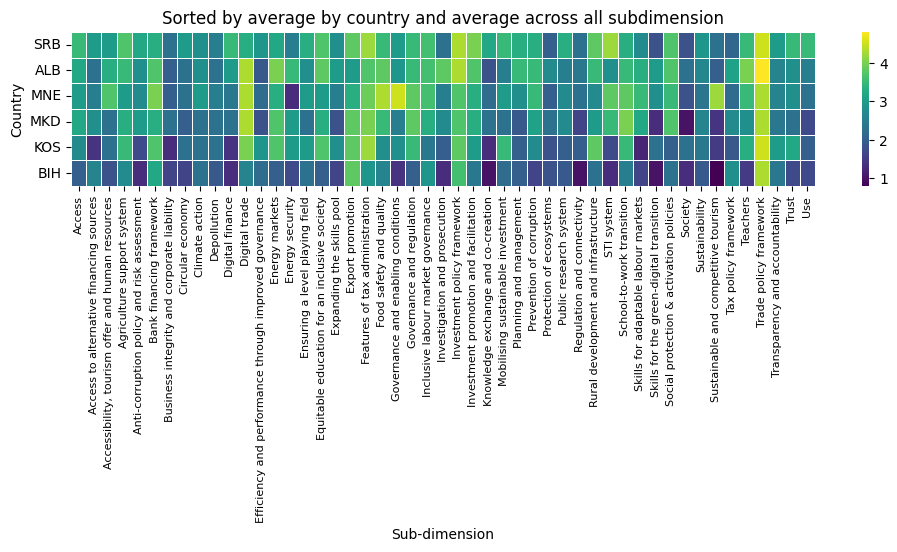

In [ ]:
# Create a pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = merged_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Calculate the average score for each economy
heatmap_data_with_labels['average_score'] = heatmap_data_with_labels.mean(axis=1)

# Sort the DataFrame by average score in descending order
heatmap_data_with_labels = heatmap_data_with_labels.sort_values(by='average_score', ascending=False)

# Remove the 'average_score' column if you don't need it anymore
heatmap_data_with_labels = heatmap_data_with_labels.drop('average_score', axis=1)

# Sort the columns (labels) by their mean score
#heatmap_data_with_labels = heatmap_data_with_labels.reindex(heatmap_data_with_labels.mean().sort_values(ascending=False).index, axis=1)

# Plot the updated heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(heatmap_data_with_labels, cmap='viridis', linewidths=.5)
plt.title('Sorted by average by country and average across all subdimension')
plt.xlabel('Sub-dimension')
plt.ylabel('Country')
plt.xticks(rotation=90,fontsize=8)
#plt.tight_layout()
#plt.savefig("heatmap.png",dpi=300)
plt.show()

In [ ]:
heatmap_data_with_labels
heatmap_data_with_labels['Average_Score'] = heatmap_data_with_labels.mean(axis=1)

In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, widgets

def plot_heatmap(sort_by):
    # Make a copy to avoid modifying the original data
    #data_to_plot = heatmap_data_with_labels.copy()
    data_to_plot = pivot_data.copy()
    # Remove 'Average_Score' from columns if it's already there
    if 'Average_Score' in data_to_plot.columns:
        data_to_plot = data_to_plot.drop(columns=['Average_Score'])

    # Sort based on the selected criteria
    if sort_by == 'Average Score (Descending)':
        data_to_plot['Average_Score'] = data_to_plot.mean(axis=1)
        data_to_plot = data_to_plot.sort_values(by='Average_Score', ascending=False)
    elif sort_by == 'Average Score (Ascending)':
        data_to_plot['Average_Score'] = data_to_plot.mean(axis=1)
        data_to_plot = data_to_plot.sort_values(by='Average_Score', ascending=True)
    elif sort_by == 'Country Name (A-Z)':
        data_to_plot = data_to_plot.sort_index(ascending=True)
    elif sort_by == 'Country Name (Z-A)':
        data_to_plot = data_to_plot.sort_index(ascending=False)

    # Remove 'Average_Score' if it was added
    if 'Average_Score' in data_to_plot.columns:
        data_to_plot = data_to_plot.drop(columns=['Average_Score'])

    # Create the heatmap
    fig = go.Figure(data=go.Heatmap(
        z=data_to_plot.values,
        x=data_to_plot.columns,
        y=data_to_plot.index,
        colorscale='Viridis',
        colorbar=dict(title='Score')
    ))

    fig.update_layout(
        title='Interactive Heatmap',
        xaxis_title='Sub-dimension',
        yaxis_title='Country',
        xaxis_nticks=36  # Adjust as needed
    )

    fig.show()


In [ ]:
# Sample data for illustration
pivot_data = pd.DataFrame({
    'AGRICULTURE_S01': [3.5, 2.3, 3.8],
    'AGRICULTURE_S02': [3.5, 2.7, 3.5],
    'AGRICULTURE_S03': [3.8, 2.6, 2.8],
    'ANTI_CORRUPTION_S01': [2.8, 1.3, 1.7],
    'ANTI_CORRUPTION_S02': [3.5, 1.6, 2.7],
}, index=['ALB', 'BIH', 'KOS'])

In [ ]:
# Define sorting options
sorting_options = [
    'Default',
    'Average Score (Descending)',
    'Average Score (Ascending)',
    'Country Name (A-Z)',
    'Country Name (Z-A)'
]

interact(
    plot_heatmap,
    sort_by=widgets.Dropdown(
        options=sorting_options,
        value='Default',
        description='Sort by:'
    )
)

interactive(children=(Dropdown(description='Sort by:', options=('Default', 'Average Score (Descending)', 'Aver…

<function __main__.plot_heatmap(sort_by)>

In [ ]:
#for key in heatmap_data_with_labels.columns:
# label = labels_df[labels_df['key'] == key]['label'].iloc[0]
#  heatmap_data_with_labels.rename(columns={key: label}, inplace=True)


In [ ]:
merged_df

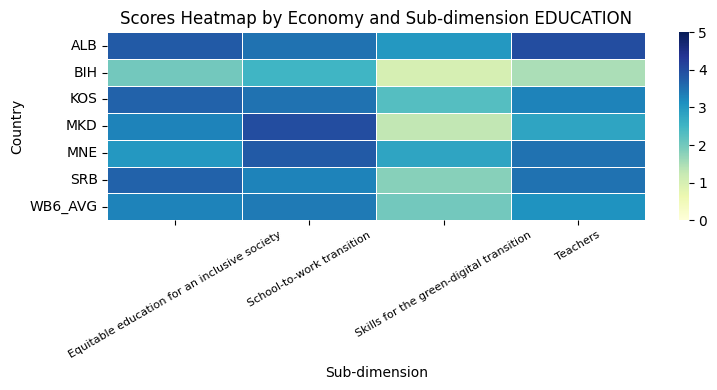

In [ ]:
# Filter for keys containing "DIGITAL"
keyword = "EDUCATION"
filtered_df = merged_df[merged_df['key'].str.contains(keyword)]

# Filter for the year 2024
filtered_df = filtered_df[filtered_df['year'] == 2024]

# Create a pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = filtered_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Plot the updated heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data_with_labels, annot=False, vmin=0, vmax=5, cmap='YlGnBu', linewidths=.5)
plt.title(f'Scores Heatmap by Economy and Sub-dimension {keyword}')
plt.xlabel('Sub-dimension')
plt.ylabel('Country')
plt.xticks(rotation=30,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Check for any missing scores in the merged DataFrame
missing_scores = merged_df.isnull().sum()
print(missing_scores)

#### An interactive heatmap

Generating an interactive heatmap using Plotly enables a detailed examination of multidimensional data by visually representing the relationships between variables. The provided code creates a pivot table from merged_df to restructure the data with economies on the y-axis and labels (sub-dimensions) on the x-axis, displaying their corresponding scores as color intensities. This visualization facilitates the detection of patterns, trends, and outliers in country scores across various sub-dimensions.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create the pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = merged_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=heatmap_data_with_labels.values,
                   x=heatmap_data_with_labels.columns,
                   y=heatmap_data_with_labels.index,
                   #colorscale='Viridis',
                   hoverongaps=False,  # Show hover info even on gaps
                   showscale=True))  # Show color scale bar

# Set title and axis labels
fig.update_layout(
    title='Interactive Heatmap: Country Scores by Sub-dimension',
    xaxis_nticks=50,
    xaxis_title='Sub-dimension',
    yaxis_title='Country',
    height=600  # Increase the figure height (adjust as needed)
)

# Show the interactive plot
fig.show()


#### Pivoting

Pivoting is used in the example to transform the filtered DataFrame into a format where each economy is a row and each sub-dimension category related to 'DIGITAL' is a column, with the corresponding scores as cell values. This restructuring allows for easier comparison of economies across different digital sub-dimensions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for a specific sub-dimension (e.g., DIGITAL)
subdimension_key = 'DIGITAL'
filtered_df = merged_df[merged_df['key'].str.startswith(subdimension_key)]

# Example: We'll aggregate the scores for one year (you can change this as needed)
year_of_interest = 2024
filtered_year_df = filtered_df[filtered_df['year'] == year_of_interest]

# Pivot the data to have economies as rows and subdimension categories as columns
pivot_data = filtered_year_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')
pivot_data

#### Radarchart

Lots of code for creating a 180degrees radarchart but most of it is setup and adjusting the angles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for a specific sub-dimension (e.g., DIGITAL)
subdimension_key = 'DIGITAL'
filtered_df = merged_df[merged_df['key'].str.startswith(subdimension_key)]

# Example: We'll aggregate the scores for one year (you can change this as needed)
year_of_interest = 2024
filtered_year_df = filtered_df[filtered_df['year'] == year_of_interest]

# Pivot the data to have economies as rows and subdimension categories as columns
pivot_data = filtered_year_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Prepare the radar chart
categories = pivot_data.columns
N = len(categories)

# Compute the angle for each category
angles = np.linspace(0, np.pi, N, endpoint=True).tolist()
# Complete the loop for radar by repeating the first category
angles += angles[:1]

#print(filtered_year_df)
#print(pivot_data)
# Set up the radar chart in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data for each country
for i, country in enumerate(pivot_data.index):
    scores = pivot_data.loc[country].values
    scores = np.concatenate((scores, [scores[0]]))  # Close the loop for the radar chart

    ax.fill(angles, scores, alpha=0.1)  # Fill the area
    ax.plot(angles, scores, linewidth=2, label=country)  # Plot the outline for each country

# Set the category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)

# Set the title
ax.set_title(f'Radar Chart for {subdimension_key} Sub-dimensions ({year_of_interest})')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_thetamax(180)
# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
merged_df

# Troubleshooting



- Do you see this error? `NameError: name 'pd' is not defined` - Make sure you imported pandas

In [ ]:
import pandas as pd

# Additional Resources



*   [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html): Explore a wide range of plots and their code examples.
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html): Step-by-step tutorials on various aspects of matplotlib.







In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dimensions_scores_historic.csv')

# Experiments

## Heatmap for scores

In [ ]:
# Experiments

year = 2024
# Filter for the year 2024
filtered_df = df[df['year'] == year]


#df
merged_df = filtered_df[filtered_df['economy'] != 'WB6_AVG']
heatmap_data = merged_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')
heatmap_data
#filtered_df

key,AGRICULTURE,ANTI_CORRUPTION,DIGITAL,EDUCATION,EMPLOYMENT,ENERGY,ENTERPRISE,ENVIRONMENT,FINANCE,INNOVATION,INVESTMENT,TAX,TOURISM,TRADE,TRANSPORT
economy,,,,,,,,,,,,,,,
ALB,3.56,3.19,2.73,3.61,3.46,3.46,2.3,2.50,3.00,2.39,3.63,3.40,2.80,4.00,2.84
BIH,2.51,1.45,1.69,1.78,2.19,1.94,2.3,1.91,2.49,1.41,2.79,2.90,1.32,3.56,1.53
KOS,3.44,2.08,2.55,3.22,2.04,3.27,3.0,2.20,2.26,1.67,3.44,2.98,2.26,4.10,1.95
MKD,3.30,2.85,2.14,2.89,3.08,3.50,2.1,2.25,2.86,2.83,3.19,3.40,1.95,4.10,1.75
MNE,3.19,2.85,2.55,3.22,3.38,2.68,2.5,2.40,3.00,2.94,3.38,2.98,4.16,3.90,2.50
SRB,3.69,2.88,3.18,3.11,3.26,3.05,3.0,2.50,3.26,3.56,4.00,3.20,2.80,3.83,2.77


In [ ]:
filtered_df
heatmap_data = filtered_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')

heatmap_data

key,AGRICULTURE,ANTI_CORRUPTION,DIGITAL,EDUCATION,EMPLOYMENT,ENERGY,ENTERPRISE,ENVIRONMENT,FINANCE,INNOVATION,INVESTMENT,TAX,TOURISM,TRADE,TRANSPORT
economy,,,,,,,,,,,,,,,
ALB,3.56,3.19,2.73,3.61,3.46,3.46,2.30,2.50,3.00,2.39,3.63,3.40,2.80,4.00,2.84
BIH,2.51,1.45,1.69,1.78,2.19,1.94,2.30,1.91,2.49,1.41,2.79,2.90,1.32,3.56,1.53
KOS,3.44,2.08,2.55,3.22,2.04,3.27,3.00,2.20,2.26,1.67,3.44,2.98,2.26,4.10,1.95
MKD,3.30,2.85,2.14,2.89,3.08,3.50,2.10,2.25,2.86,2.83,3.19,3.40,1.95,4.10,1.75
MNE,3.19,2.85,2.55,3.22,3.38,2.68,2.50,2.40,3.00,2.94,3.38,2.98,4.16,3.90,2.50
SRB,3.69,2.88,3.18,3.11,3.26,3.05,3.00,2.50,3.26,3.56,4.00,3.20,2.80,3.83,2.77
WB6_AVG,3.27,2.55,2.47,2.97,2.90,2.97,2.52,2.28,2.81,2.46,3.40,3.11,2.54,3.91,2.20


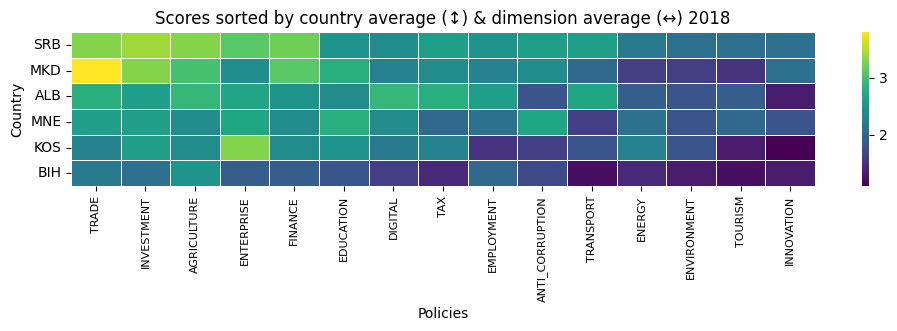

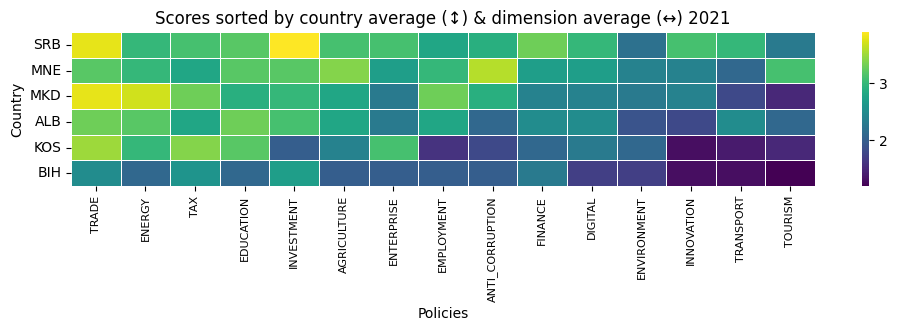

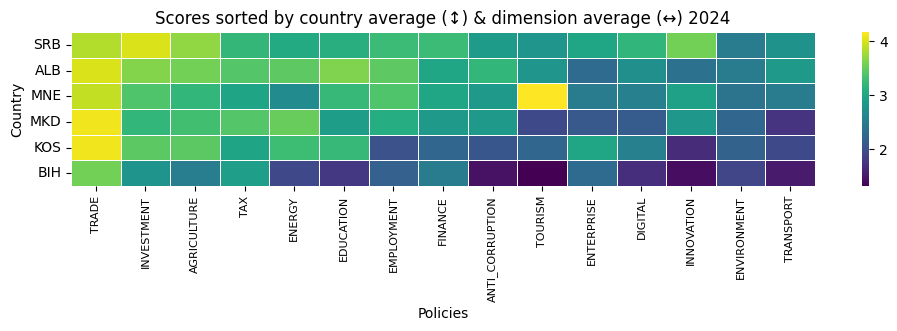

In [ ]:
years = [2018, 2021, 2024]

for year in years:
  # Filter for the year 2024
  filtered_df = df[df['year'] == year]


  #df
  merged_df = filtered_df[filtered_df['economy'] != 'WB6_AVG']
  heatmap_data = merged_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')


  # Calculate the average score for each economy
  heatmap_data['average_score'] = heatmap_data.mean(axis=1)

  # Sort the DataFrame by average score in descending order
  heatmap_data = heatmap_data.sort_values(by='average_score', ascending=False)

  # Remove the 'average_score' column if you don't need it anymore
  heatmap_data = heatmap_data.drop('average_score', axis=1)

  # Sort the columns (labels) by their mean score
  heatmap_data = heatmap_data.reindex(heatmap_data.mean().sort_values(ascending=False).index, axis=1)

  # Plot the updated heatmap
  plt.figure(figsize=(12, 2))
  sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5)
  plt.title(f'Scores sorted by country average (↕) & dimension average (↔) {year}')
  plt.xlabel('Policies')
  plt.ylabel('Country')
  plt.xticks(rotation=90,fontsize=8)
  #plt.tight_layout()
  plt.savefig(f"heatmap_{year}.png",dpi=300)
  plt.show()

## Import indicators

In [85]:
!wget -O indicator.csv https://drive.switch.ch/index.php/s/HA2bieai6eVZv41/download
!wget -O indicator_quantitative.csv https://drive.switch.ch/index.php/s/MvjqmtcwjigJtqO/download

--2024-09-26 12:49:13--  https://drive.switch.ch/index.php/s/HA2bieai6eVZv41/download
Resolving drive.switch.ch (drive.switch.ch)... 86.119.34.138, 86.119.34.137, 2001:620:5ca1:1ee::12, ...
Connecting to drive.switch.ch (drive.switch.ch)|86.119.34.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270617 (264K) [text/csv]
Saving to: ‘indicator.csv’

indicator.csv       100%[===================>] 264.27K   841KB/s    in 0.3s    

2024-09-26 12:49:14 (841 KB/s) - ‘indicator.csv’ saved [270617/270617]

--2024-09-26 12:49:14--  https://drive.switch.ch/index.php/s/MvjqmtcwjigJtqO/download
Resolving drive.switch.ch (drive.switch.ch)... 86.119.34.138, 86.119.34.137, 2001:620:5ca1:1ee::12, ...
Connecting to drive.switch.ch (drive.switch.ch)|86.119.34.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34925 (34K) [text/csv]
Saving to: ‘indicator_quantitative.csv’

indicator_quantitat 100%[===================>]  34.11K  --.-KB/s    in 0.1s   

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("indicator.csv")

In [129]:
df

,id,indicator,label,ALB,BIH_STATE,BIH_RS,BIH_FBIH,KOS,MNE,MKD,SRB
0,1.0,INVESTMENT_QL01,There is a separate and transparent regulatory...,YES*,YES,YES,YES,YES,YES,YES,YES
1,1.0,INVESTMENT_QL01,There are adequate provisions against expropri...,YES,YES,YES,YES,YES,YES,YES,YES
2,1.0,INVESTMENT_QL01,A legal framework for private-public partnersh...,YES,NO,YES,YES*,YES,YES,YES,YES
3,1.0,INVESTMENT_QL01,Due compensation is calculated on an appropria...,YES,NO,YES,YES,YES,YES,YES,YES
4,1.0,INVESTMENT_QL01,Investors can easily access information on law...,YES,YES,YES,YES,YES,YES,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...
1516,NaN,TOURISM_QL10,The sustainable tourism policy framework is in...,NO,NOT_AVAILABLE,NO,NO,NO,YES,NO,YES*
1517,NaN,TOURISM_QL10,Economic instruments to enhance the sustainabi...,YES,NOT_AVAILABLE,YES,NO,YES,YES,NO,NO
1518,NaN,TOURISM_QL10,Regular monitoring and evaluation of the polic...,NO,NOT_AVAILABLE,NO,NO,NO,YES,NO,NO
1519,NaN,TOURISM_QL10,Measures are in place to monitor visitor satis...,NO,NOT_AVAILABLE,YES,NO,NO,NO,NO,NO


In [130]:
# Replace values in the DataFrame
df = df.replace(['YES*', 'YES'], 1)
df = df.replace(['NO'], 0)
#df = df.replace(['NOT_AVAILABLE'], -1)
df = df.replace(['NOT_AVAILABLE'], 0)
df

,id,indicator,label,ALB,BIH_STATE,BIH_RS,BIH_FBIH,KOS,MNE,MKD,SRB
0,1.0,INVESTMENT_QL01,There is a separate and transparent regulatory...,1,1,1,1,1,1,1,1
1,1.0,INVESTMENT_QL01,There are adequate provisions against expropri...,1,1,1,1,1,1,1,1
2,1.0,INVESTMENT_QL01,A legal framework for private-public partnersh...,1,0,1,1,1,1,1,1
3,1.0,INVESTMENT_QL01,Due compensation is calculated on an appropria...,1,0,1,1,1,1,1,1
4,1.0,INVESTMENT_QL01,Investors can easily access information on law...,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1516,NaN,TOURISM_QL10,The sustainable tourism policy framework is in...,0,0,0,0,0,1,0,1
1517,NaN,TOURISM_QL10,Economic instruments to enhance the sustainabi...,1,0,1,0,1,1,0,0
1518,NaN,TOURISM_QL10,Regular monitoring and evaluation of the polic...,0,0,0,0,0,1,0,0
1519,NaN,TOURISM_QL10,Measures are in place to monitor visitor satis...,0,0,1,0,0,0,0,0


In [131]:
df_quantitative = pd.read_csv("indicator_quantitative.csv")
# cleanup df_quantitative
df_quantitative = df_quantitative[['key', 'economy', 'score']]
df_quantitative

,key,economy,score
0,INVESTMENT_QL01,ALB,4.5
1,INVESTMENT_QL01,BIH,3.5
2,INVESTMENT_QL01,KOS,4.5
3,INVESTMENT_QL01,MNE,3.5
4,INVESTMENT_QL01,MKD,3.5
...,...,...,...
1024,TOURISM_QL10,KOS,1.0
1025,TOURISM_QL10,MNE,4.0
1026,TOURISM_QL10,MKD,0.5
1027,TOURISM_QL10,SRB,2.0


In [132]:
# prompt: df_quantitative pivot by key
pivot_df = df_quantitative.pivot_table(index='economy', columns='key', values='score')
pivot_df

key,AGRICULTURE_QL01,AGRICULTURE_QL02,AGRICULTURE_QL03,AGRICULTURE_QL04,AGRICULTURE_QL05,AGRICULTURE_QL06,AGRICULTURE_QL07,AGRICULTURE_QL08,ANTI_CORRUPTION_QL01,ANTI_CORRUPTION_QL02,...,TRANSPORT_QL01,TRANSPORT_QL02,TRANSPORT_QL03,TRANSPORT_QL04,TRANSPORT_QL05,TRANSPORT_QL06,TRANSPORT_QL07,TRANSPORT_QL08,TRANSPORT_QL09,TRANSPORT_QL10
economy,,,,,,,,,,,,,,,,,,,,,
ALB,3.5,3.0,4.0,4.0,3.0,3.5,4.0,3.5,3.5,2.5,...,3.5,4.5,3.5,2.5,3.0,3.0,2.0,1.5,3.0,1.5
BIH,2.0,2.5,2.3,2.8,3.0,2.3,2.3,2.8,1.2,1.8,...,2.2,1.5,3.0,1.3,1.5,2.0,0.0,0.3,2.0,1.5
KOS,3.5,4.0,4.0,3.5,3.5,3.5,3.0,2.5,1.0,2.0,...,3.0,1.0,2.5,1.5,2.5,2.0,2.0,1.5,2.0,1.5
MKD,3.0,3.0,3.0,4.0,3.5,2.5,4.0,3.0,3.5,2.5,...,2.5,2.0,2.0,1.0,2.0,2.5,1.0,1.0,2.0,1.5
MNE,3.5,2.0,2.5,3.5,3.0,2.5,4.5,4.0,1.0,4.5,...,3.5,3.5,3.5,0.5,2.0,2.5,2.0,2.5,2.0,2.5
SRB,3.5,4.0,4.0,3.5,3.5,4.0,3.0,4.0,3.0,4.0,...,3.0,4.0,4.0,2.0,3.0,3.0,1.5,1.5,3.0,2.5
WB6_AVG,3.2,3.1,3.3,3.6,3.3,3.1,3.5,3.3,2.2,2.9,...,3.0,2.8,3.1,1.5,2.3,2.5,1.4,1.4,2.3,1.8


In [108]:
# prompt: sort by aggregated average over each row
pivot_df['Average'] = pivot_df.mean(axis=1)
pivot_df_sorted = pivot_df.sort_values('Average', ascending=False)
pivot_df_sorted = pivot_df_sorted.drop('Average', axis=1)
pivot_df_sorted

key,AGRICULTURE_QL01,AGRICULTURE_QL02,AGRICULTURE_QL03,AGRICULTURE_QL04,AGRICULTURE_QL05,AGRICULTURE_QL06,AGRICULTURE_QL07,AGRICULTURE_QL08,ANTI_CORRUPTION_QL01,ANTI_CORRUPTION_QL02,...,TRANSPORT_QL01,TRANSPORT_QL02,TRANSPORT_QL03,TRANSPORT_QL04,TRANSPORT_QL05,TRANSPORT_QL06,TRANSPORT_QL07,TRANSPORT_QL08,TRANSPORT_QL09,TRANSPORT_QL10
economy,,,,,,,,,,,,,,,,,,,,,
SRB,3.5,4.0,4.0,3.5,3.5,4.0,3.0,4.0,3.0,4.0,...,3.0,4.0,4.0,2.0,3.0,3.0,1.5,1.5,3.0,2.5
ALB,3.5,3.0,4.0,4.0,3.0,3.5,4.0,3.5,3.5,2.5,...,3.5,4.5,3.5,2.5,3.0,3.0,2.0,1.5,3.0,1.5
MNE,3.5,2.0,2.5,3.5,3.0,2.5,4.5,4.0,1.0,4.5,...,3.5,3.5,3.5,0.5,2.0,2.5,2.0,2.5,2.0,2.5
WB6_AVG,3.2,3.1,3.3,3.6,3.3,3.1,3.5,3.3,2.2,2.9,...,3.0,2.8,3.1,1.5,2.3,2.5,1.4,1.4,2.3,1.8
MKD,3.0,3.0,3.0,4.0,3.5,2.5,4.0,3.0,3.5,2.5,...,2.5,2.0,2.0,1.0,2.0,2.5,1.0,1.0,2.0,1.5
KOS,3.5,4.0,4.0,3.5,3.5,3.5,3.0,2.5,1.0,2.0,...,3.0,1.0,2.5,1.5,2.5,2.0,2.0,1.5,2.0,1.5
BIH,2.0,2.5,2.3,2.8,3.0,2.3,2.3,2.8,1.2,1.8,...,2.2,1.5,3.0,1.3,1.5,2.0,0.0,0.3,2.0,1.5


In [113]:
# Sort by average score for each economy
pivot_df_sorted = pivot_df.sort_values('Average', ascending=False)

# Calculate the average score for each key (column)
column_averages = pivot_df_sorted.mean()

# Sort the columns based on their average score
sorted_columns = column_averages.sort_values(ascending=False).index

# Rearrange the columns in the DataFrame
pivot_df_sorted = pivot_df_sorted[sorted_columns.tolist() + ['Average']]

pivot_df_sorted
pivot_df_sorted.to_csv("pivot.csv")

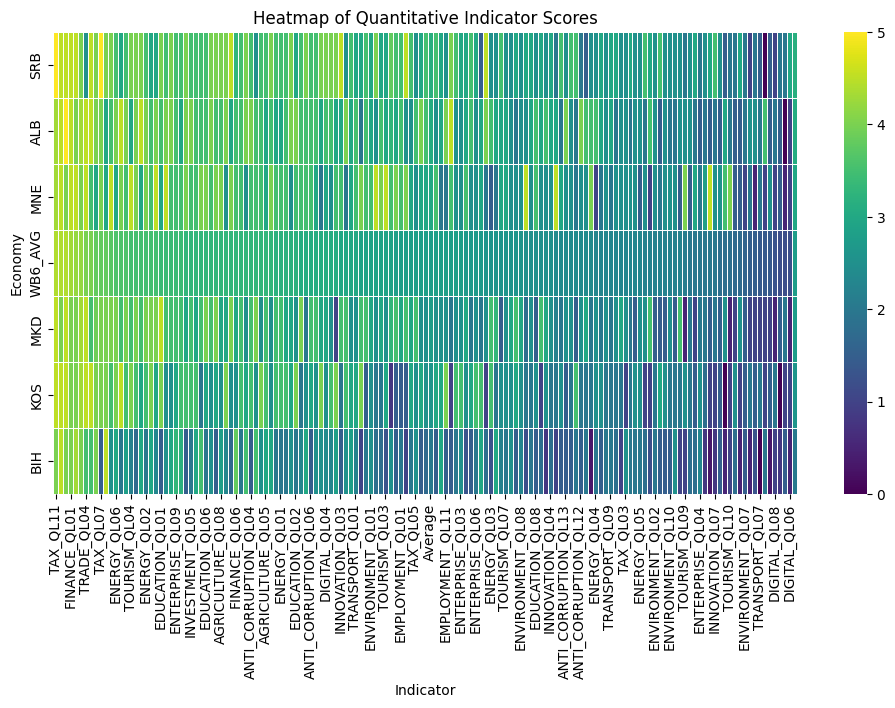

In [112]:
# prompt: create heatmap for pivoted table
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df_sorted, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Quantitative Indicator Scores')
plt.xlabel('Indicator')
plt.ylabel('Economy')
plt.xticks(rotation=90)
plt.show()

In [135]:
pivot_data = df.groupby(['label','indicator'])[['ALB', 'BIH_STATE', 'KOS', 'MNE', 'MKD', 'SRB']].max()
aggregated_data = df.groupby('indicator')[['ALB', 'BIH_STATE', 'KOS', 'MNE', 'MKD', 'SRB']].max()

pivot_data
#aggregated_data

,,ALB,BIH_STATE,KOS,MNE,MKD,SRB
label,indicator,,,,,,
A comprehensive range of tax information is available online to taxpayers.,TAX_QL11,1,0,1,1,1,1
All schools are equipped with the adequate ICT infrastructure.,EDUCATION_QL08,0,0,0,0,0,0
Market operators for the operation of organised energy markets are established and market participation requirements are published.\n*Not fully established,ENERGY_QL09,1,0,1,1,1,1
"Periodic reviews are conducted on the legal framework’s quality and accuracy for financing through blockchain technology, with corrective actions as needed.",FINANCE_QL08,0,0,0,0,0,0
The policy framework reflects short- and long-term projections and account for uncertainties on current and future water availability.,ENVIRONMENT_QL05,1,0,1,1,1,0
...,...,...,...,...,...,...,...
Yearly monitoring activities on the food quality framework are conducted. \n*Partially,AGRICULTURE_QL08,1,0,0,1,0,1
expropriation orders are carefully reviewed by an independent authority.,INVESTMENT_QL01,1,0,0,0,0,1
external auditors are required by law to be independent of SOEs’ management and large shareholders.,ENTERPRISE_QL07,1,0,1,1,1,1


In [140]:
# prompt: aggregate pivot_dat where ["indicator"] are same - make wildcard for AGRICULTURE_QL04 QL01 QL02 QL03 ...

# Create a new column 'indicator_group' to store the wildcard indicator name
pivot_data['indicator_group'] = pivot_data.index.get_level_values('indicator').str.replace(r'_QL\d+', '_QL*', regex=True)
pivot_data['indicator_group']
# Group by the 'indicator_group' column and aggregate
aggregated_data = pivot_data.groupby('indicator_group').mean()

aggregated_data.to_json("indicator.json")
#aggregated_data

pivot_data.to_json("indicators_all.json", orient='index')
pivot_data

,,ALB,BIH_STATE,KOS,MNE,MKD,SRB,indicator_group
label,indicator,,,,,,,
A comprehensive range of tax information is available online to taxpayers.,TAX_QL11,1,0,1,1,1,1,TAX_QL*
All schools are equipped with the adequate ICT infrastructure.,EDUCATION_QL08,0,0,0,0,0,0,EDUCATION_QL*
Market operators for the operation of organised energy markets are established and market participation requirements are published.\n*Not fully established,ENERGY_QL09,1,0,1,1,1,1,ENERGY_QL*
"Periodic reviews are conducted on the legal framework’s quality and accuracy for financing through blockchain technology, with corrective actions as needed.",FINANCE_QL08,0,0,0,0,0,0,FINANCE_QL*
The policy framework reflects short- and long-term projections and account for uncertainties on current and future water availability.,ENVIRONMENT_QL05,1,0,1,1,1,0,ENVIRONMENT_QL*
...,...,...,...,...,...,...,...,...
Yearly monitoring activities on the food quality framework are conducted. \n*Partially,AGRICULTURE_QL08,1,0,0,1,0,1,AGRICULTURE_QL*
expropriation orders are carefully reviewed by an independent authority.,INVESTMENT_QL01,1,0,0,0,0,1,INVESTMENT_QL*
external auditors are required by law to be independent of SOEs’ management and large shareholders.,ENTERPRISE_QL07,1,0,1,1,1,1,ENTERPRISE_QL*


In [141]:
# Assuming your DataFrame is named 'pivot_data'
pivot_data_no_label = pivot_data.reset_index().drop(columns=['label'])
pivot_data_no_label.to_json('output.json', orient='records')


In [55]:
top_labels = aggregated_data.mean(axis=1).sort_values(ascending=False).tail(50)
top_labels

,0
indicator,
TAX_QL03,0.666667
TAX_QL07,0.666667
TAX_QL05,0.666667
TOURISM_QL06,0.666667
TAX_QL08,0.666667
TOURISM_QL10,0.666667
TAX_QL09,0.666667
TAX_QL10,0.666667
TAX_QL11,0.666667


In [68]:
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define custom color palette: -1=grey, 0=white, 1=black
custom_cmap = ListedColormap(['grey', 'white', 'black'])

# Define boundaries to map each value to a distinct color
bounds = [-1.5, -0.5, 0.5, 1.5]  # Boundaries between -1, 0, and 1
norm = BoundaryNorm(bounds, custom_cmap.N)

<ipython-input-76-acaeb59f371a>:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


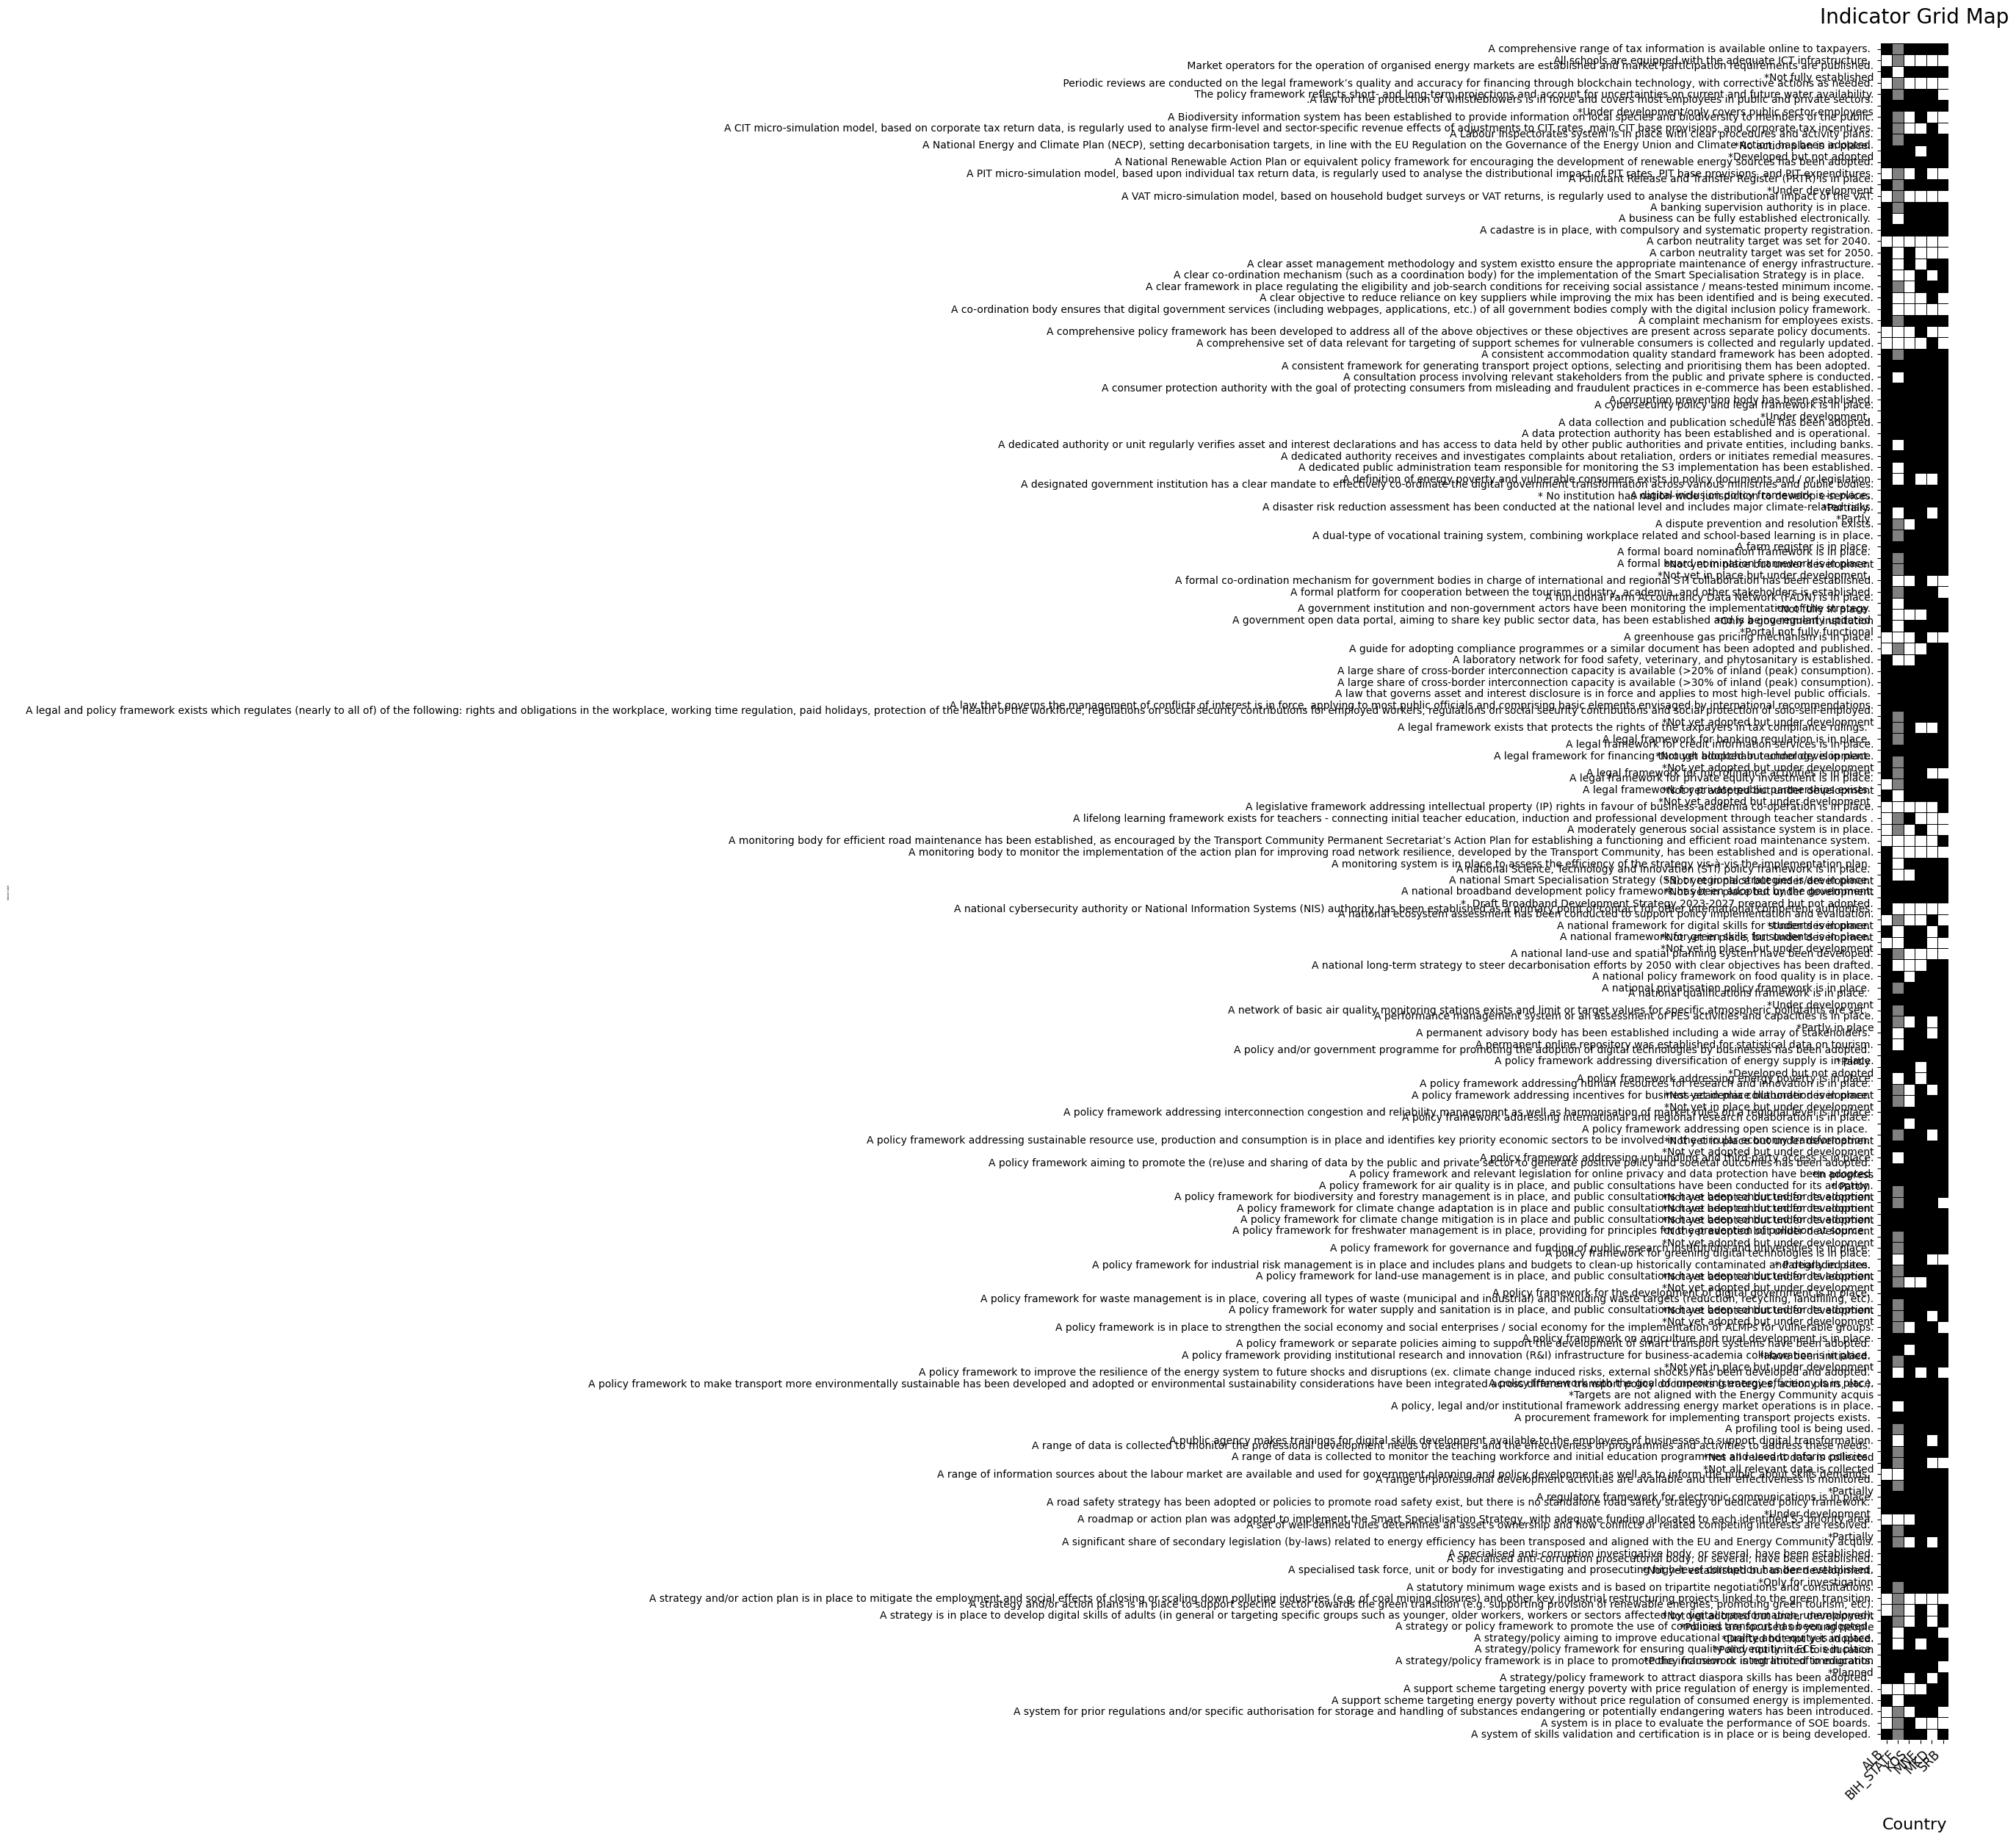

In [76]:
cell_height = 0.02  # inches per row
num_rows = 1500
height = num_rows * cell_height  # Total height in inches (1500 * 0.02 = 30 inches)
width = 6  # inches (adjust as needed for horizontal space)

plt.figure(figsize=(width, height))
# Plot the heatmap
sns.heatmap(
        pivot_data.head(150),
    cmap=custom_cmap,
    norm=norm,
    cbar=False,               # Hide the color bar
    linewidths=0.5,           # Add lines between cells for clarity
    linecolor='black',        # Color of the lines
    square=True,              # Make cells square-shaped
    annot=False,               # Annotate cells with their values
    fmt='d',                  # Integer format for annotations
)

# Set the title and labels
plt.title('Indicator Grid Map', fontsize=20, pad=20)
plt.xlabel('Country', fontsize=16, labelpad=15)
plt.ylabel('Indicator Label', fontsize=2, labelpad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Rotate y-axis labels and adjust alignment
#plt.yticks([], [])  # This hides y-axis labels

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the heatmap
plt.show()

In [49]:
top_labels = pivot_data.mean(axis=1).sort_values(ascending=False).head(50).index
top_labels


Index(['The government implemented several transit facilitation programmes. ',
       'Formal co-ordination mechanism is in place to adequately disseminate information and integrate investor feedback into future policies.',
       'Foreign arbitral awards are generally recognised and enforced by local courts. ',
       'The procedures for selecting, appointing and dismissing the head of the body comprise safeguards against arbitrariness and ensure public accountability. \n*Only general public administration rules for one of the bodies',
       'Reports on the activities and performance of the communications regulator are published regularly.\n*  Not consistently',
       'Resource efficiency at the production phase is addressed, such as through extended Producer Responsibility (EPR) schemes.\n*Under development',
       'The policy/programme includes specific measures to support the development of start-up firms in the information and communications technology sector. \n*Limited. ',
  